In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import Point

colors = ["#41afaa", "#466eb4", "#00a0e1", "#e6a532", "#d7642c", "#af4b91"]

In [2]:
bce = Point(19.058302, 47.486147)
bce = gpd.GeoDataFrame(geometry=[bce], crs=4326).to_crs(23700)["geometry"][0]

In [3]:
h7 = gpd.read_file("data/budapest_h3_7.geojson").to_crs(23700)
h8 = gpd.read_file("data/budapest_h3_8.geojson").to_crs(23700)
h9 = gpd.read_file("data/budapest_h3_9.geojson").to_crs(23700)
h10 = gpd.read_file("data/budapest_h3_10.geojson").to_crs(23700)

data = {
    7: h7,
    8: h8,
    9: h9,
    10: h10,
}

In [4]:
selected7 = h7.query("h3_polyfill == '871e03781ffffff'").reset_index(drop=True).copy()
s7_poly = selected7.geometry[0]

s7_poly = h7[h7["geometry"].intersects(bce)].reset_index(drop=True).geometry[0]
s8_poly = h8[h8["geometry"].intersects(bce)].reset_index(drop=True).geometry[0]
s9_poly = h9[h9["geometry"].intersects(bce)].reset_index(drop=True).geometry[0]
s10_poly = h10[h10["geometry"].intersects(bce)].reset_index(drop=True).geometry[0]

polys = {
    7: s7_poly,
    8: s8_poly,
    9: s9_poly,
    10: s10_poly,
}

In [5]:
columns = ["hexagon level", "number in Budapest", "area (km^2^)", "area (m^2^)"]
print("|hexagon level|number in Budapest|area (km^2^)|area (m^2^)|")
print("".join([f"|{':':{'-'}>{len(i)}}" for i in columns]) + "|")

for i in range(7, 11):
    print(
        (
            f"|{i:{' '}>{len(columns[0])}}"
            f"|{len(data[i]):{' '}>{len(columns[1])}}"
            f"|{round(polys[i].area / 1e6, 3):{' '}>{len(columns[2])}}"
            f"|{round(polys[i].area):{' '}>{len(columns[3])}}|"
        )
    )

|hexagon level|number in Budapest|area (km^2^)|area (m^2^)|
|------------:|-----------------:|-----------:|----------:|
|            7|               100|       5.225|    5225025|
|            8|               703|       0.746|     746377|
|            9|              4939|       0.107|     106621|
|           10|             34528|       0.015|      15232|


In [6]:
h8["intersection_area"] = h8["geometry"].intersection(s7_poly).area
h9["intersection_area"] = h9["geometry"].intersection(s7_poly).area

In [ ]:
# keep = (
#     h8["geometry"]
#     .intersection(s7_poly)
#     .area.reset_index()
#     .rename({0: "area"}, axis=1)
#     .query("area>63000")["index"]
# )

In [7]:
h8[h8["intersection_area"] > 63000]

,h3_polyfill,geometry,intersection_area
46,881e037811fffff,"POLYGON ((649422.573 237626.581, 649239.617 23...",746432.125048
68,881e03781bfffff,"POLYGON ((650147.971 238228.395, 649965.038 23...",684181.515810
88,881e037813fffff,"POLYGON ((650324.573 237345.989, 650141.635 23...",684278.362120
376,881e037815fffff,"POLYGON ((648697.139 237024.737, 648514.161 23...",684277.349259
608,881e03781dfffff,"POLYGON ((648520.617 237907.16, 648337.643 237...",684180.500039
621,881e037819fffff,"POLYGON ((649246.019 238508.952, 649063.068 23...",684132.598759
695,881e037817fffff,"POLYGON ((649599.144 236744.124, 649416.184 23...",684326.296854


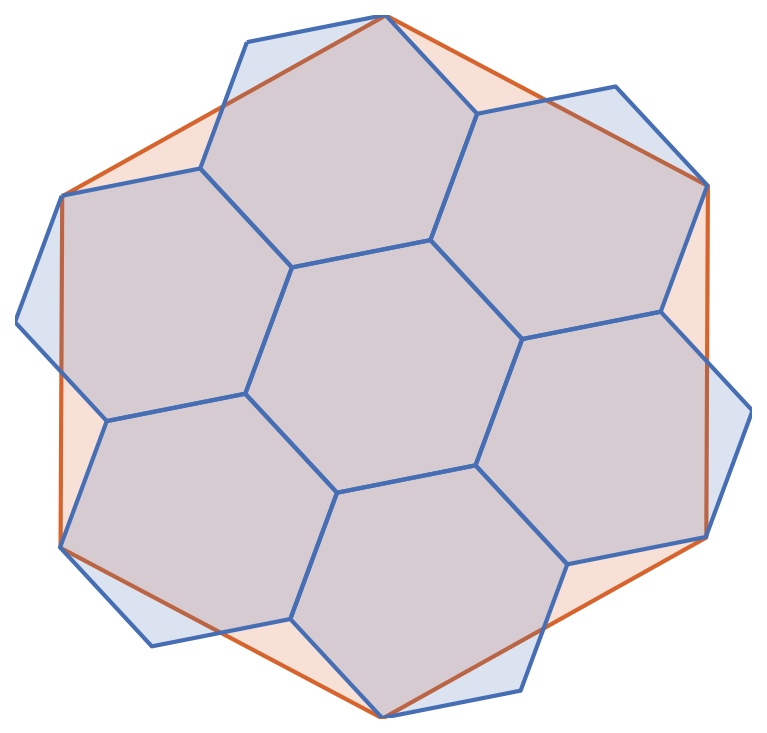

In [8]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150, layout="constrained")
selected7.plot(ec=colors[4], fc=colors[4] + "30", lw=2, ax=ax)
h8[h8["intersection_area"] > 63000].plot(ec=colors[1], fc=colors[1] + "30", lw=2, ax=ax)
# h9[h9["intersection_area"] > 60000].plot(ec=colors[3], fc=colors[3] + "30", lw=2, ax=ax)
ax.margins(0)
ax.axis("off")
for i in ["png", "svg"]:
    fig.savefig(f"figures/h7_h8.{i}")

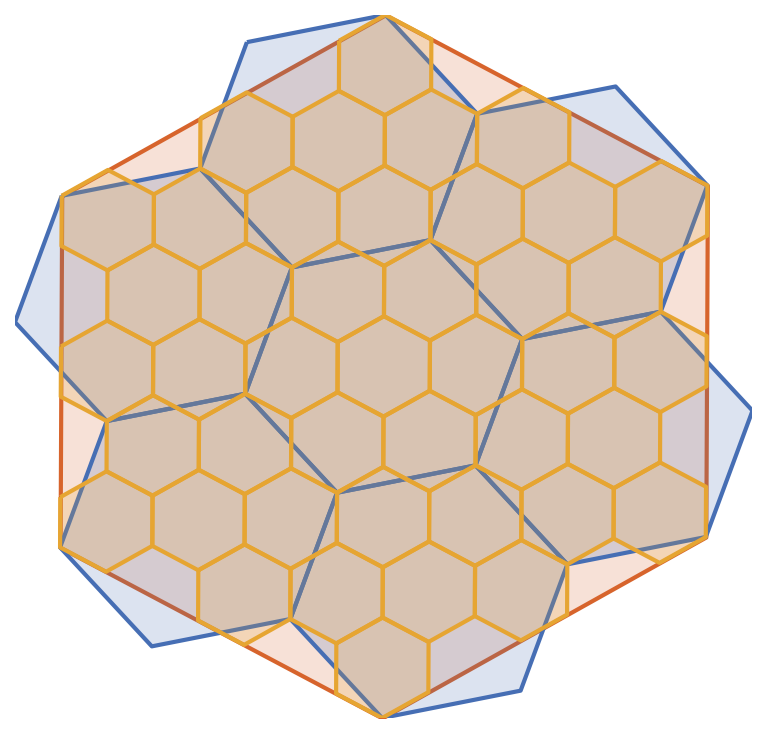

In [9]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150, layout="constrained")
selected7.plot(ec=colors[4], fc=colors[4] + "30", lw=2, ax=ax)
h8[h8["intersection_area"] > 63000].plot(ec=colors[1], fc=colors[1] + "30", lw=2, ax=ax)
h9[h9["intersection_area"] > 60000].plot(ec=colors[3], fc=colors[3] + "30", lw=2, ax=ax)
ax.margins(0)
ax.axis("off")
for i in ["png", "svg"]:
    fig.savefig(f"figures/h7_h8_h9.{i}")